In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
df = sns.load_dataset("anscombe")
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


I, mean:7.500909090909093, var:4.127269090909091, corr=(0.81642051634484, 0.0021696288730787875)
II, mean:7.500909090909091, var:4.127629090909091, corr=(0.8162365060002427, 0.0021788162369108027)
III, mean:7.500000000000001, var:4.12262, corr=(0.8162867394895982, 0.002176305279228025)
IV, mean:7.50090909090909, var:4.12324909090909, corr=(0.8165214368885029, 0.002164602347197218)


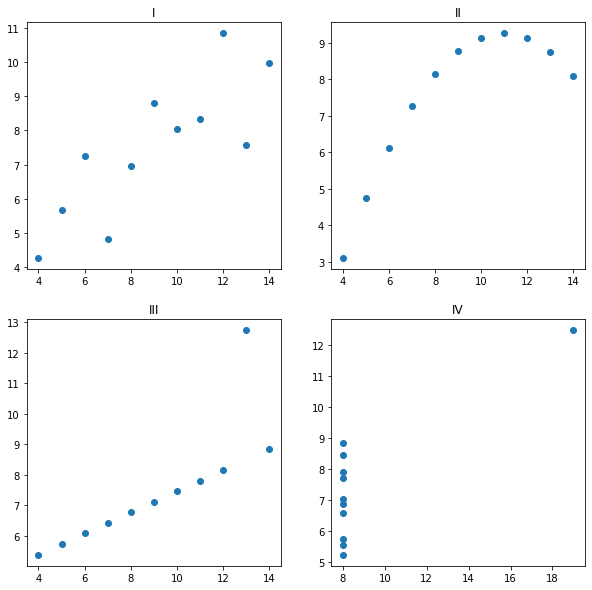

In [4]:
plt.subplots(2, 2, figsize=(10,10))
for index, ds in enumerate( ['I','II','III','IV'] , 1):
    df_tmp = df.query(f"dataset=='{ds}'")
    plt.subplot(2, 2, index)
    plt.scatter(df_tmp.x, df_tmp.y)
    plt.title(ds)
    print(f"{ds}, mean:{df_tmp.y.mean()}, var:{df_tmp.y.var()}, corr={pearsonr(df_tmp.x, df_tmp.y)}")

In [5]:
def estimate_coef(x, y):
    xmean, ymean = np.mean(x), np.mean(y)
    a = ((x-xmean)*(y-ymean)).sum() / ((x-xmean)**2).sum()
    b = ymean - a*xmean
    return a,b
    

In [6]:
def plot_lines(x, y, coef):
    plt.figure(figsize=(7,7))
    plt.scatter(x, y, c="g")
    
    a,b = coef
    y_pred = a*x + b
    plt.plot(x, y_pred, c="r")    

In [9]:
np.random.seed(42)
N = 150
X = np.random.randn(N)*6 - 3
y = 2*X + np.random.randn(N)*6

In [11]:
coef = estimate_coef(X, y)
coef

(1.9741641672473753, 0.33710909665765953)

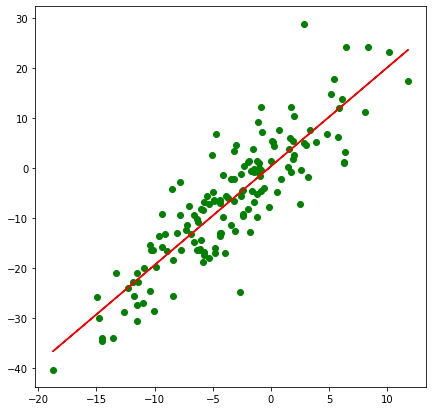

In [12]:
plot_lines(X, y, coef)

In [13]:
pearsonr(X, y)

(0.8765664733653389, 7.368971947550388e-49)

### Użycie biblioteki scikit learn

In [14]:
from sklearn.linear_model import LinearRegression

In [17]:
X.ndim

1

In [18]:
model = LinearRegression()
model.fit(X.reshape(-1,1), y)

LinearRegression()

In [19]:
model.coef_, model.intercept_

(array([1.97416417]), 0.3371090966576604)

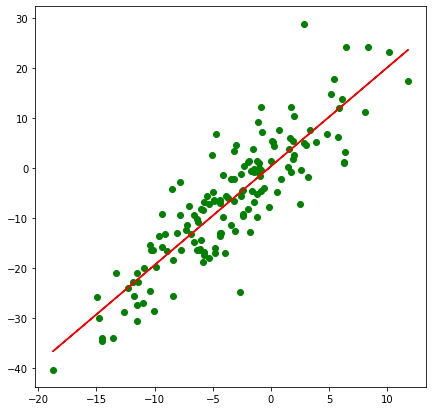

In [20]:
plot_lines(X, y, (model.coef_[0], model.intercept_) )

In [21]:
# metryki
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [24]:
y_pred = model.predict(X.reshape(-1,1))

In [27]:
mean_absolute_error(y, y_pred), mean_squared_error(y, y_pred), r2_score(y, y_pred)

(4.802299730503761, 37.308580008175745, 0.7683687822281473)